## 1. Business Context

The objective of this analysis is to predict whether a customer is likely to purchase travel insurance, based on demographic, income, and travel-related features.

The goal is not only predictive accuracy, but also to understand the key drivers behind insurance purchase decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/vjain/OneDrive/Desktop/mENTORSHIP/Insurance/TravelInsurancePrediction_Dataset.csv")

## 2. Data Overview and Quality Checks
Initial checks were performed to ensure data consistency and validity before analysis.

In [3]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,30.999900,Government Sector,Yes,9.000000e+05,3.003979,0.013118,No,No,0.005462
1,25.990394,Government Sector,Yes,1.300000e+06,5.004967,-0.007177,Yes,Yes,-0.002154
2,33.992974,Government Sector,Yes,1.300000e+06,4.013509,1.004100,No,No,-0.019903
3,33.000537,Government Sector,Yes,4.000000e+05,6.012644,-0.003509,No,No,-0.009334
4,32.001252,Private Sector/Self Employed,Yes,3.500000e+05,2.997488,0.993146,No,No,0.024896


In [4]:
df.shape

(101000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  101000 non-null  float64
 1   Employment Type      101000 non-null  object 
 2   GraduateOrNot        101000 non-null  object 
 3   AnnualIncome         101000 non-null  float64
 4   FamilyMembers        101000 non-null  float64
 5   ChronicDiseases      101000 non-null  float64
 6   FrequentFlyer        101000 non-null  object 
 7   EverTravelledAbroad  101000 non-null  object 
 8   TravelInsurance      101000 non-null  float64
dtypes: float64(5), object(4)
memory usage: 6.9+ MB


In [6]:
df['Age'] = df['Age'].abs()
df['Age'] = df['Age'].astype(int)

In [7]:
df['FamilyMembers'] = df['FamilyMembers'].abs()
df['FamilyMembers'] = df['FamilyMembers'].astype(int)

In [8]:
df['Insurance_clean'] = df['TravelInsurance'].apply(lambda x: 1 if x >= 0.5 else 0)

In [9]:
df['ChronicDiseases'] = df['ChronicDiseases'].abs()

In [10]:
df['ChronicDiseases_clean'] = df['ChronicDiseases'].apply(lambda x: 1 if x >= 0.5 else 0)

In [11]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Insurance_clean,ChronicDiseases_clean
0,30,Government Sector,Yes,9.000000e+05,3,0.013118,No,No,0.005462,0,0
1,25,Government Sector,Yes,1.300000e+06,5,0.007177,Yes,Yes,-0.002154,0,0
2,33,Government Sector,Yes,1.300000e+06,4,1.004100,No,No,-0.019903,0,1
3,33,Government Sector,Yes,4.000000e+05,6,0.003509,No,No,-0.009334,0,0
4,32,Private Sector/Self Employed,Yes,3.500000e+05,2,0.993146,No,No,0.024896,0,1


In [12]:
# Check 1 missing values
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    return percent_nan.sort_values(ascending=False)

percent_missing(df)

Age                      0.0
Employment Type          0.0
GraduateOrNot            0.0
AnnualIncome             0.0
FamilyMembers            0.0
ChronicDiseases          0.0
FrequentFlyer            0.0
EverTravelledAbroad      0.0
TravelInsurance          0.0
Insurance_clean          0.0
ChronicDiseases_clean    0.0
dtype: float64

In [13]:
df.duplicated().value_counts()

False    101000
Name: count, dtype: int64

## 3. Exploratory Data Analysis

## 3A. Univariate analysis

In [14]:
df.select_dtypes(include=['int64', 'float64']).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,101000.0,29.26,2.95,24.00,27.00,29.00,32.00,35.00
AnnualIncome,101000.0,932852.48,360896.40,299999.96,600000.01,900000.00,1200000.01,1800000.03
FamilyMembers,101000.0,4.39,1.83,1.00,3.00,4.00,6.00,9.00
ChronicDiseases,101000.0,0.34,0.47,0.00,0.00,0.01,0.99,1.04
TravelInsurance,101000.0,0.39,0.49,-0.04,-0.00,0.01,1.00,1.04
Insurance_clean,101000.0,0.39,0.49,0.00,0.00,0.00,1.00,1.00
ChronicDiseases_clean,101000.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00


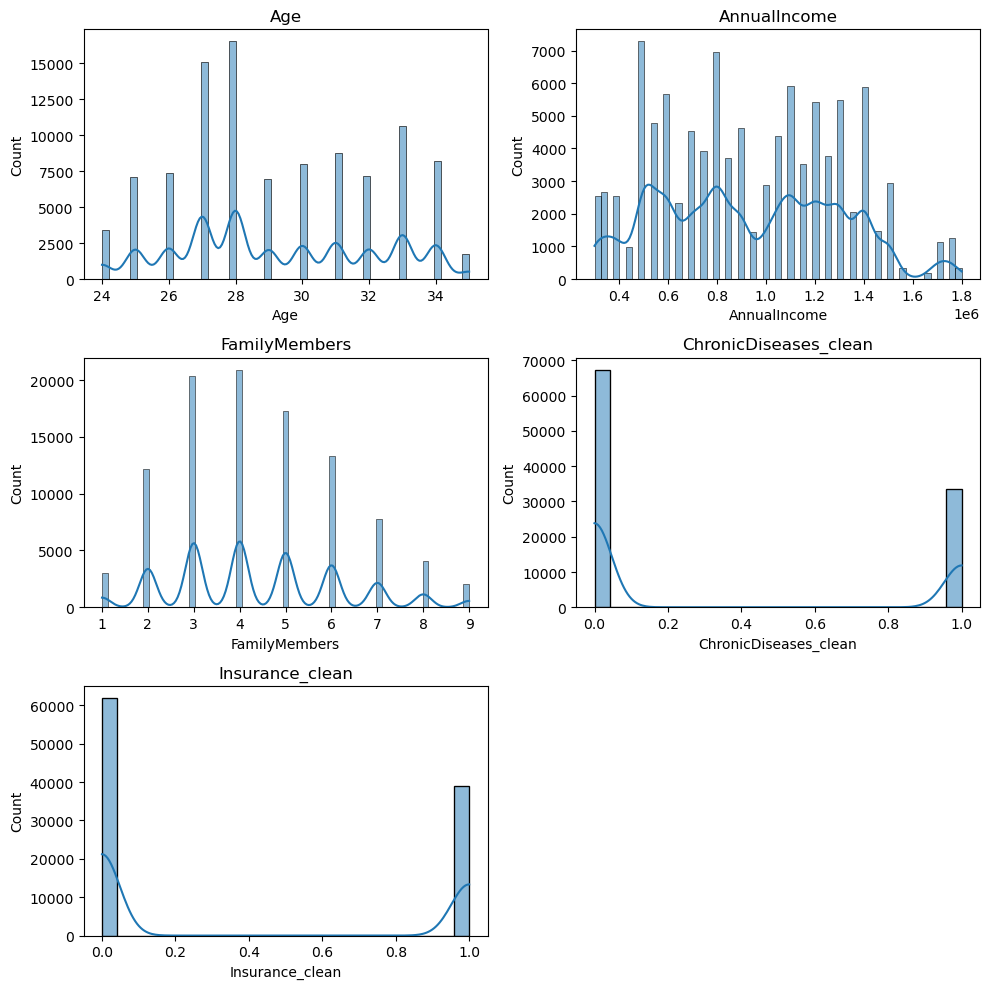

In [15]:
cols = [
    "Age", "AnnualIncome", "FamilyMembers",
    "ChronicDiseases_clean", "Insurance_clean"]

plt.figure(figsize=(10, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
df = df.drop(columns=['TravelInsurance', 'ChronicDiseases'])

In [18]:
# categorical variables
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print("\n====================")
    print(f"Value counts for: {col}\n")
    counts = df[col].value_counts()
    perc = (df[col].value_counts(normalize=True) * 100).round(2)

    print(pd.DataFrame({'count': counts, 'percent': perc}))


Value counts for: Employment Type

                              count  percent
Employment Type                             
Private Sector/Self Employed  70604     69.9
Government Sector             30396     30.1

Value counts for: GraduateOrNot

               count  percent
GraduateOrNot                
Yes            84749    83.91
No             16251    16.09

Value counts for: FrequentFlyer

               count  percent
FrequentFlyer                
No             77141    76.38
Yes            23859    23.62

Value counts for: EverTravelledAbroad

                     count  percent
EverTravelledAbroad                
No                   81163    80.36
Yes                  19837    19.64


## 3B. Bivariate and multivariate analysis

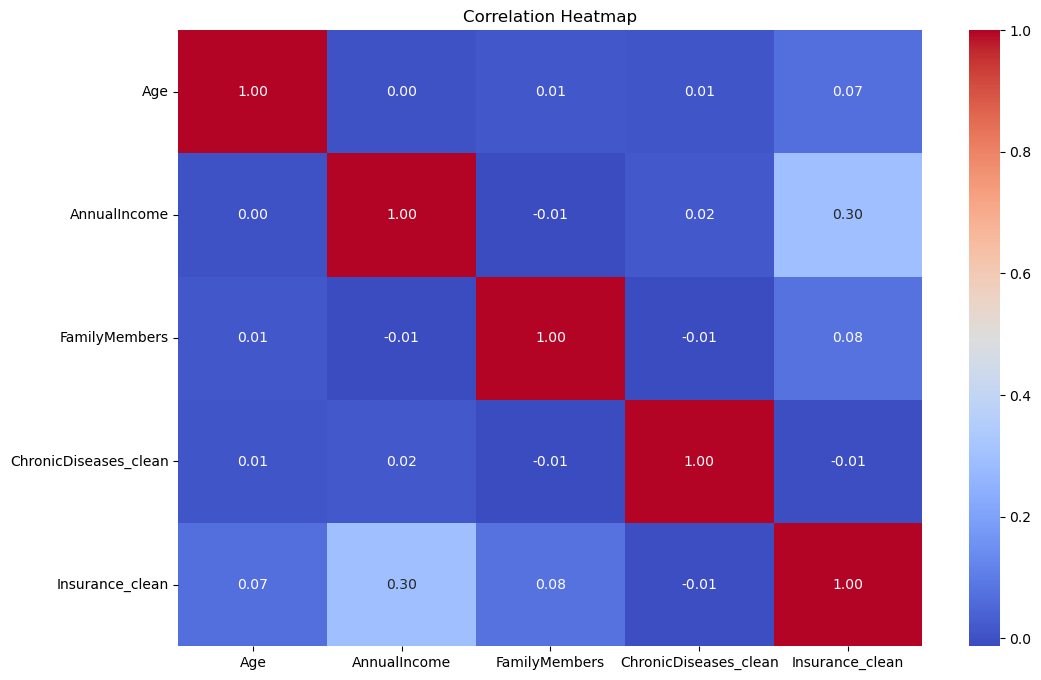

In [19]:
cols = df[[
    "Age", "AnnualIncome", "FamilyMembers",
    "ChronicDiseases_clean", "Insurance_clean"]]

plt.figure(figsize=(12, 8))
sns.heatmap(cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select numeric columns (excluding target)
X = cols.drop('Insurance_clean', axis=1)	

# Add constant term
X_const = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# Round to 2 decimals
vif["VIF"] = vif["VIF"].round(2)

vif

,feature,VIF
0,const,111.4
1,Age,1.0
2,AnnualIncome,1.0
3,FamilyMembers,1.0
4,ChronicDiseases_clean,1.0


In [21]:
cols.corr()['Insurance_clean'].sort_values()

ChronicDiseases_clean   -0.006183
Age                      0.067342
FamilyMembers            0.077511
AnnualIncome             0.295259
Insurance_clean          1.000000
Name: Insurance_clean, dtype: float64

In [22]:
df_prep = df.copy()

## 4. Feature Engineering

In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_prep[col] = le.fit_transform(df_prep[col])
    encoders[col] = le

In [24]:
df_prep.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,Insurance_clean,ChronicDiseases_clean
0,30,0,1,9.000000e+05,3,0,0,0,0
1,25,0,1,1.300000e+06,5,1,1,0,0
2,33,0,1,1.300000e+06,4,0,0,0,1
3,33,0,1,4.000000e+05,6,0,0,0,0
4,32,1,1,3.500000e+05,2,0,0,0,1


In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np

sc_age = StandardScaler()
df_prep['Age_scaled'] = sc_age.fit_transform(df_prep[['Age']])

In [26]:
from sklearn.preprocessing import RobustScaler

# Log transform
df_prep['AnnualIncome_log'] = np.log(df_prep['AnnualIncome'])

# Robust Scale the log-transformed values
sc_income = RobustScaler()
df_prep['AnnualIncome_scaled'] = sc_income.fit_transform(df_prep[['AnnualIncome_log']])

In [27]:
sc_family = StandardScaler()
df_prep['FamilyMembers_scaled'] = sc_family.fit_transform(df_prep[['FamilyMembers']])

In [28]:
df_prep = df_prep.drop(columns=['Age', 'AnnualIncome', 'FamilyMembers', 'AnnualIncome_log'])

In [29]:
# feature selection reduction

In [30]:
# test 1 categorical vs categorical chi2
from sklearn.feature_selection import chi2
import pandas as pd

categorical_cols = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'ChronicDiseases_clean']

chi_scores, p_values = chi2(df_prep[categorical_cols], df_prep['Insurance_clean'])

chi_results = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2 Score': chi_scores,
    'P-Value': p_values
})

chi_results.sort_values('P-Value')

,Feature,Chi2 Score,P-Value
3,EverTravelledAbroad,4.497586,0.033943
4,ChronicDiseases_clean,2.577098,0.108420
0,Employment Type,0.725674,0.394289
2,FrequentFlyer,0.352143,0.552903
1,GraduateOrNot,0.006935,0.933631


In [31]:
# Anova variance
from sklearn.feature_selection import f_classif

num_cols = df_prep[['Age_scaled', 'AnnualIncome_scaled', 'FamilyMembers_scaled']]

X = num_cols
y = df_prep['Insurance_clean']

f_values, p_values = f_classif(X,y)

anova_results = pd.DataFrame({'Feature': X.columns,
                              'F_statistic': f_values,
                              'P_values': p_values})

anova_results['P_values'] = anova_results['P_values'].round(6)
anova_results

,Feature,F_statistic,P_values
0,Age_scaled,460.105464,0.0
1,AnnualIncome_scaled,7803.613929,0.0
2,FamilyMembers_scaled,610.464660,0.0


In [32]:
from sklearn.feature_selection import mutual_info_classif

X = df_prep.drop('Insurance_clean', axis=1)	
y = df_prep['Insurance_clean']

mi_scores = mutual_info_classif(X,y)

mi_df = pd.DataFrame(
    {
        'features': X.columns,
        'mi_score': mi_scores}
).sort_values(by = 'mi_score', ascending=False)

mi_df

,features,mi_score
6,AnnualIncome_scaled,0.109682
5,Age_scaled,0.017860
0,Employment Type,0.012065
1,GraduateOrNot,0.009811
3,EverTravelledAbroad,0.002603
7,FamilyMembers_scaled,0.001964
4,ChronicDiseases_clean,0.001552
2,FrequentFlyer,0.001456


In [33]:
from sklearn.ensemble import RandomForestClassifier

X = df_prep.drop('Insurance_clean', axis=1)	
y = df_prep['Insurance_clean']

rf = RandomForestClassifier(n_estimators = 600, random_state=42)

rf.fit(X,y)

importances = rf.feature_importances_

rf_df = pd.DataFrame(
    {
        'features': X.columns,
        'Importance': importances}
).sort_values(by = 'Importance', ascending=False)

rf_df

,features,Importance
6,AnnualIncome_scaled,0.660833
5,Age_scaled,0.160710
7,FamilyMembers_scaled,0.135050
4,ChronicDiseases_clean,0.014450
2,FrequentFlyer,0.007728
0,Employment Type,0.007277
1,GraduateOrNot,0.007090
3,EverTravelledAbroad,0.006862


In [35]:
df_prep = df_prep.drop(columns = ['GraduateOrNot', 'FrequentFlyer', 'Employment Type', 'EverTravelledAbroad'])

In [36]:
df_prep.head()

,Insurance_clean,ChronicDiseases_clean,Age_scaled,AnnualIncome_scaled,FamilyMembers_scaled
0,0,0,0.249610,-1.754437e-08,-0.762440
1,0,0,-1.442897,5.305147e-01,0.331534
2,0,1,1.265114,5.305147e-01,-0.215453
3,0,0,1.265114,-1.169925e+00,0.878521
4,0,1,0.926612,-1.362570e+00,-1.309427


## 5. MAIN MODEL: CATBOOST MODEL IMPLEMENTATION

In [37]:
df_prep['Insurance_clean'].value_counts()

Insurance_clean
0    61981
1    39019
Name: count, dtype: int64

In [44]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
from catboost import CatBoostClassifier

In [40]:
X = df_prep.drop('Insurance_clean', axis=1)
y = df_prep['Insurance_clean']

In [41]:
param_grid = {
    'iterations': [550, 600],
    'learning_rate': [0.03, 0.04],
    'depth': [4, 5],
    'l2_leaf_reg': [5],  
    'random_strength': [1],
    'bagging_temperature': [0.5, 0.6],
}

In [43]:
cat_model = CatBoostClassifier(
    border_count=128,          
    grow_policy='SymmetricTree',
    thread_count=4,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=False,
    task_type='CPU'
)

In [45]:
grid = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

In [46]:
grid.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\vjain\anaconda3\envs\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
11 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vjain\anaconda3\envs\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vjain\anaconda3\envs\ml_env\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\vjain\anaconda3\envs\m

,estimator,<catboost.cor...001EA2CFA9810>
,param_grid,"{'bagging_temperature': [0.5, 0.6], 'depth': [4, 5], 'iterations': [550, 600], 'l2_leaf_reg': [5], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [47]:
print("Best roc_auc:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best roc_auc: 0.8655948529310556
Best Params: {'bagging_temperature': 0.5, 'depth': 5, 'iterations': 600, 'l2_leaf_reg': 5, 'learning_rate': 0.04, 'random_strength': 1}


In [48]:
best_model = CatBoostClassifier(
    iterations=600,
    learning_rate=0.04,
    depth=5,
    l2_leaf_reg=5,
    random_strength=1,
    bagging_temperature=0.5,
    border_count=128,
    grow_policy='SymmetricTree',
    loss_function='Logloss',
    eval_metric='AUC',
    task_type='CPU',
    verbose=False
)

best_model.fit(X, y)

In [49]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, 
    recall_score, f1_score, confusion_matrix, classification_report, roc_curve
)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [51]:
best_model.fit(X_train, y_train)

In [52]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [53]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

ROC-AUC: 0.8654185240472902
Accuracy: 0.7847524752475248
Precision: 0.8551171393341553
Recall: 0.5331881086622245
F1-score: 0.6568271507498027

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.94      0.84     12396
           1       0.86      0.53      0.66      7804

    accuracy                           0.78     20200
   macro avg       0.81      0.74      0.75     20200
weighted avg       0.80      0.78      0.77     20200

Confusion Matrix:
 [[11691   705]
 [ 3643  4161]]


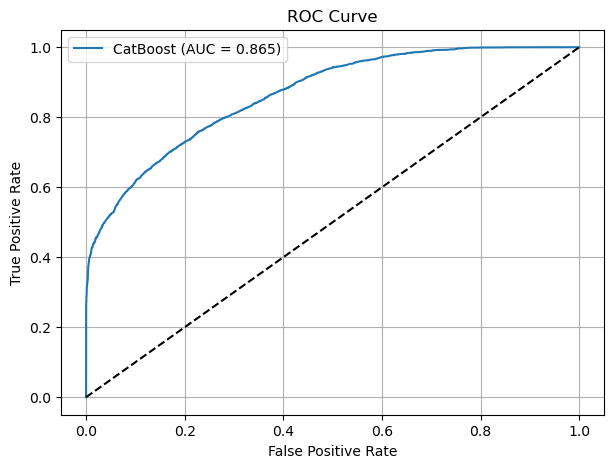

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='CatBoost (AUC = %.3f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
thresholds = np.arange(0.1, 0.91, 0.05)

results = []

for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    
    # Metrics
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    
    results.append([
        t, precision, recall, f1, accuracy, tn, fp, fn, tp
    ])

# Final table
threshold_table = pd.DataFrame(
    results,
    columns=["Threshold", "Precision", "Recall", "F1 Score", "Accuracy",
             "TN", "FP", "FN", "TP"]
)

print(threshold_table)

    Threshold  Precision    Recall  F1 Score  Accuracy     TN     FP    FN  \
0        0.10   0.423999  0.999744  0.595459  0.475198   1797  10599     2   
1        0.15   0.462062  0.992568  0.630576  0.550693   3378   9018    58   
2        0.20   0.505129  0.971681  0.664709  0.621287   4967   7429   221   
3        0.25   0.565339  0.905818  0.696179  0.694554   6961   5435   735   
4        0.30   0.651059  0.787545  0.712828  0.754851   9102   3294  1658   
5        0.35   0.726591  0.695028  0.710459  0.781139  10355   2041  2380   
6        0.40   0.788001  0.624423  0.696740  0.790000  11085   1311  2931   
7        0.45   0.822998  0.583291  0.682715  0.790545  11417    979  3252   
8        0.50   0.855117  0.533188  0.656827  0.784752  11691    705  3643   
9        0.55   0.887888  0.505382  0.644129  0.784257  11898    498  3860   
10       0.60   0.904932  0.486674  0.632947  0.781931  11997    399  4006   
11       0.65   0.918593  0.468478  0.620502  0.778614  12072   

In [57]:
# threshold tuning assessment
def evaluate_thresholds(y_true, y_proba, thresholds=None):
    if thresholds is None:
        thresholds = np.arange(0.0, 1.01, 0.01)
    
    results = []
    
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        
        fpr = fp / (fp + tn)
        tpr = recall  # same as recall
        
        results.append({
            "threshold": t,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "tn": tn, "fp": fp, "fn": fn, "tp": tp,
            "tpr": tpr,
            "fpr": fpr,
            "youden_j": tpr - fpr
        })
    
    return results

In [58]:
results = evaluate_thresholds(y_test, y_pred_proba)

C:\Users\vjain\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [59]:
df_thresh = pd.DataFrame(results)

In [60]:
df_thresh

,threshold,precision,recall,f1,tn,fp,fn,tp,tpr,fpr,youden_j
0,0.00,0.386337,1.000000,0.557349,0,12396,0,7804,1.000000,1.000000,0.000000
1,0.01,0.389014,1.000000,0.560129,139,12257,0,7804,1.000000,0.988787,0.011213
2,0.02,0.392062,1.000000,0.563283,295,12101,0,7804,1.000000,0.976202,0.023798
3,0.03,0.395239,1.000000,0.566554,455,11941,0,7804,1.000000,0.963295,0.036705
4,0.04,0.400092,0.999872,0.571502,696,11700,1,7803,0.999872,0.943853,0.056019
...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,1.000000,0.161328,0.277833,12396,0,6545,1259,0.161328,0.000000,0.161328
97,0.97,1.000000,0.124680,0.221716,12396,0,6831,973,0.124680,0.000000,0.124680
98,0.98,1.000000,0.076243,0.141684,12396,0,7209,595,0.076243,0.000000,0.076243
99,0.99,1.000000,0.030882,0.059913,12396,0,7563,241,0.030882,0.000000,0.030882


In [61]:
best_f1_row = df_thresh.loc[df_thresh['f1'].idxmax()]
best_f1_threshold = best_f1_row['threshold']

print("Best F1 Threshold:", best_f1_threshold)
print(best_f1_row)

Best F1 Threshold: 0.31
threshold       0.310000
precision       0.669396
recall          0.764864
f1              0.713953
tn           9448.000000
fp           2948.000000
fn           1835.000000
tp           5969.000000
tpr             0.764864
fpr             0.237819
youden_j        0.527046
Name: 31, dtype: float64


## 6. Error Analysis

In [65]:
# ERROR ANALYSIS (performed on unscaled values to understand so that we can create binnings
df_orig1 = df.copy()

In [66]:
df_orig1.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,Insurance_clean,ChronicDiseases_clean
0,30,Government Sector,Yes,9.000000e+05,3,No,No,0,0
1,25,Government Sector,Yes,1.300000e+06,5,Yes,Yes,0,0
2,33,Government Sector,Yes,1.300000e+06,4,No,No,0,1
3,33,Government Sector,Yes,4.000000e+05,6,No,No,0,0
4,32,Private Sector/Self Employed,Yes,3.500000e+05,2,No,No,0,1


In [67]:
df_pred = pd.DataFrame({
    'index': X_test.index,
    'y_true': y_test.values,
    'y_pred': y_pred,
    'proba': y_pred_proba
})

In [68]:
df_error = df_orig1.merge(df_pred, left_index=True, right_on='index', how='right')
df_error.drop(columns=['index'], inplace=True)

In [69]:
df_error['FP'] = ((df_error['y_true']==0) & (df_error['y_pred']==1)).astype(int)
df_error['FN'] = ((df_error['y_true']==1) & (df_error['y_pred']==0)).astype(int)

In [70]:
df_error['Income_bin'] = pd.qcut(df_error['AnnualIncome'], q=5)
df_error.groupby('Income_bin')[['FP','FN']].sum()

C:\Users\vjain\AppData\Local\Temp\ipykernel_27916\2843342114.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_error.groupby('Income_bin')[['FP','FN']].sum()


,FP,FN
Income_bin,,
"(299999.965, 550000.013]",64,773
"(550000.013, 799999.999]",95,794
"(799999.999, 1050000.008]",159,839
"(1050000.008, 1299999.99]",50,1034
"(1299999.99, 1800000.024]",337,203


In [77]:
income_summary = df_error.groupby('Income_bin').agg(
    FP_count=('FP', 'sum'),
    FN_count=('FN', 'sum'),
    Total=('FP', 'count')   # or count of rows
)

C:\Users\vjain\AppData\Local\Temp\ipykernel_27916\1530012788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_summary = df_error.groupby('Income_bin').agg(


In [79]:
income_summary['FP_rate'] = income_summary['FP_count'] / income_summary['Total']
income_summary['FN_rate'] = income_summary['FN_count'] / income_summary['Total']
income_summary

,FP_count,FN_count,Total,FP_rate,FN_rate
Income_bin,,,,,
"(299999.965, 550000.013]",64,773,4040,0.015842,0.191337
"(550000.013, 799999.999]",95,794,4040,0.023515,0.196535
"(799999.999, 1050000.008]",159,839,4040,0.039356,0.207673
"(1050000.008, 1299999.99]",50,1034,4040,0.012376,0.255941
"(1299999.99, 1800000.024]",337,203,4040,0.083416,0.050248


In [71]:
df_error

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,Insurance_clean,ChronicDiseases_clean,y_true,y_pred,proba,FP,FN,Income_bin
0,27,Private Sector/Self Employed,No,8.000000e+05,1,No,Yes,0,1,0,0,0.287203,0,0,"(550000.013, 799999.999]"
1,31,Private Sector/Self Employed,Yes,3.500000e+05,4,No,No,0,1,0,0,0.030491,0,0,"(299999.965, 550000.013]"
2,28,Private Sector/Self Employed,Yes,8.000000e+05,2,No,No,0,0,0,0,0.396833,0,0,"(550000.013, 799999.999]"
3,35,Government Sector,Yes,8.000000e+05,2,No,Yes,1,0,1,0,0.366701,0,1,"(550000.013, 799999.999]"
4,34,Private Sector/Self Employed,Yes,1.400000e+06,5,No,No,1,1,1,1,0.765238,0,0,"(1299999.99, 1800000.024]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,31,Private Sector/Self Employed,No,1.400000e+06,6,No,No,0,1,0,1,0.824428,1,0,"(1299999.99, 1800000.024]"
20196,31,Government Sector,Yes,3.000000e+05,4,No,No,0,0,0,0,0.002763,0,0,"(299999.965, 550000.013]"
20197,29,Private Sector/Self Employed,Yes,5.500000e+05,8,No,No,0,0,0,0,0.049764,0,0,"(299999.965, 550000.013]"
20198,27,Government Sector,Yes,6.500000e+05,9,No,No,0,0,0,0,0.239402,0,0,"(550000.013, 799999.999]"


In [72]:
df_error['Age_bin'] = pd.cut(df_error['Age'], bins=[18,25,30,35,40,45,60])
df_error.groupby('Age_bin')[['FP','FN']].sum()

C:\Users\vjain\AppData\Local\Temp\ipykernel_27916\1894614575.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_error.groupby('Age_bin')[['FP','FN']].sum()


,FP,FN
Age_bin,,
"(18, 25]",114,248
"(25, 30]",101,2322
"(30, 35]",490,1073
"(35, 40]",0,0
"(40, 45]",0,0
"(45, 60]",0,0


In [73]:
def family_bin(f):
    if f == 0:
        return 'No Family'
    elif 1 <= f <= 3:
        return 'Moderate Family'
    else:
        return 'Large Family'

df_error['Family_bin'] = df_error['FamilyMembers'].apply(family_bin)

In [74]:
df_error.groupby('Family_bin')[['FP','FN']].sum()

,FP,FN
Family_bin,,
Large Family,538,2183
Moderate Family,167,1460


## 7. Explainability (SHAP)

In [81]:
import shap

In [82]:
explainer = shap.TreeExplainer(best_model)

In [83]:
X_shap = X_test.copy()

In [84]:
shap_values_all = explainer.shap_values(X_shap)


if isinstance(shap_values_all, list):
    shap_values = shap_values_all[1]
else:
    shap_values = shap_values_all

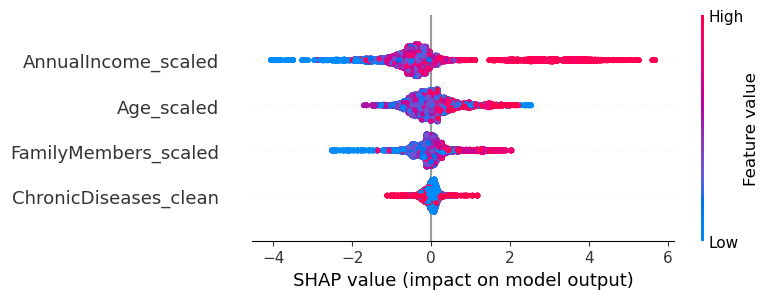

In [85]:
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="dot",   # default beeswarm
    show=True
)

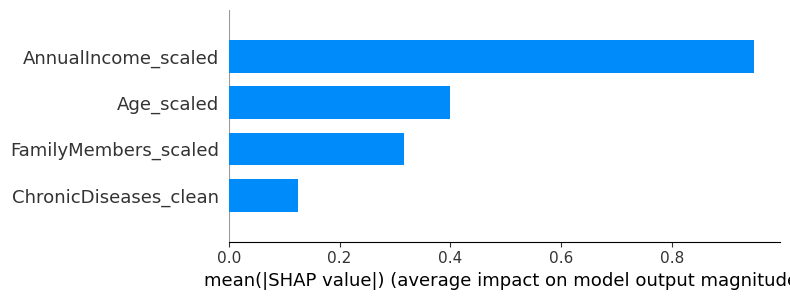

In [86]:
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="bar",
    show=True
)